<a href="https://colab.research.google.com/github/sanu1230/Assignments/blob/master/Boosting_Forest_Cover_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting Assignment Solution

### FOREST COVER TYPE

**Dataset Description**

1. Elevation - Elevation in meters

2. Aspect - Aspect in degrees azimuth

3. Slope - Slope in degrees

4. Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features

5. Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features

6. Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway

7. Hillshade_9am - Hillshade index at 9am, summer solstice

8. Hillshade_Noon - Hillshade index at noon, summer soltice

9. Hillshade_3pm - Hillshade index at 3pm, summer solstice

10. Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points

11. Wilderness_Area (4 binary columns) - Wilderness area designation

12. Soil_Type (40 binary columns) - Soil Type designation

13. Cover_Type (7 types) - Forest Cover Type designation

### 1. Import the relevant packages and Read the dataset

In [52]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
# Reading the dataset
forest = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UpX/Ensemble(Boosting, Bagging & Stacking)/covtype.csv')

### 2. Explore the Dataset

In [200]:
# Getting the head of the dataset
forest.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [201]:
# Value counts for COVER TYPE column
forest['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [202]:
# Shape of the dataset
forest.shape

(581012, 55)

#### Sampling

In [203]:
forest = forest.sample(frac=0.5)
forest.shape

(290506, 55)

In [204]:
# Info of the dataset
forest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290506 entries, 185525 to 130774
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           290506 non-null  int64
 1   Aspect                              290506 non-null  int64
 2   Slope                               290506 non-null  int64
 3   Horizontal_Distance_To_Hydrology    290506 non-null  int64
 4   Vertical_Distance_To_Hydrology      290506 non-null  int64
 5   Horizontal_Distance_To_Roadways     290506 non-null  int64
 6   Hillshade_9am                       290506 non-null  int64
 7   Hillshade_Noon                      290506 non-null  int64
 8   Hillshade_3pm                       290506 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  290506 non-null  int64
 10  Wilderness_Area1                    290506 non-null  int64
 11  Wilderness_Area2                    290506 non-

### 3. Perform the Descriptive Statistics for the dataset

In [205]:
# Summary statistics for the dataset
forest.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,290506.00000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.000000,290506.00000
mean,2959.62819,155.427230,14.104738,269.441554,46.392918,2354.405806,212.140345,223.329597,142.545056,1982.560983,0.450008,0.051789,0.434504,0.063699,0.005129,0.012998,0.008251,0.021511,0.002833,0.011366,0.000176,0.000282,0.001959,0.056099,0.021218,0.052274,0.029600,0.001043,0.000003,0.004836,0.005769,0.003174,0.007191,0.015869,0.001435,0.056873,0.100032,0.036853,0.000792,0.004516,0.001931,0.001749,0.198860,0.051847,0.044040,0.089086,0.077516,0.002733,0.003356,0.000213,0.000516,0.027015,0.023717,0.015335,2.05109
std,280.21241,111.870215,7.489913,212.678807,58.198936,1560.359287,26.759416,19.791389,38.202540,1326.620367,0.497495,0.221601,0.495693,0.244217,0.071433,0.113266,0.090460,0.145080,0.053150,0.106006,0.013249,0.016798,0.044213,0.230113,0.144111,0.222580,0.169482,0.032279,0.001855,0.069376,0.075736,0.056247,0.084494,0.124968,0.037860,0.231601,0.300044,0.188401,0.028126,0.067051,0.043902,0.041781,0.399143,0.221719,0.205185,0.284868,0.267410,0.052208,0.057836,0.014607,0.022717,0.162127,0.152167,0.122883,1.39678
min,1859.00000,0.000000,0.000000,0.000000,-164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2809.00000,58.000000,9.000000,108.000000,7.000000,1110.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,2996.00000,127.000000,13.000000,218.000000,30.000000,2001.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

**We could see that the max and min for all the columns are different so scaling should be done**

### 4. Check for null values and if any are present do the null value treatment

In [206]:
# Checking for null values
forest.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


**We could see that there are no null values present in the dataset**

### 5. Perform EDA for the dataset

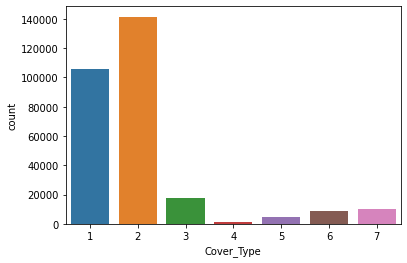

In [207]:
# Count plot for COVER TYPE column
sns.countplot(x=forest['Cover_Type'])

**We could see of all the 7 forest types,type 2 as the most count of forests**


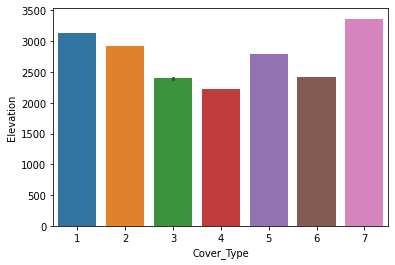

In [208]:
# Bar plot for COVER TYPE vs ELEVATION columns
sns.barplot(x='Cover_Type',y='Elevation',data=forest)

**We could type 7 has a lot more Elevation followed by type 1 and type 2 forests**

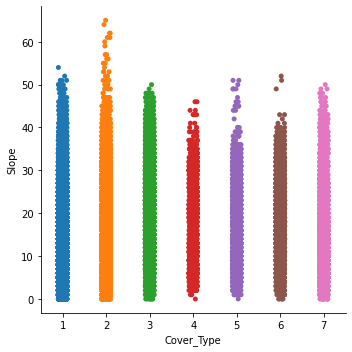

In [209]:
# Cat plot for COVER TYPE vs SLOPE columns
sns.catplot(x='Cover_Type',y='Slope',data=forest)

**We could see for the types 2 forests the Slope is very much high followed by forest types 1 and 3**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


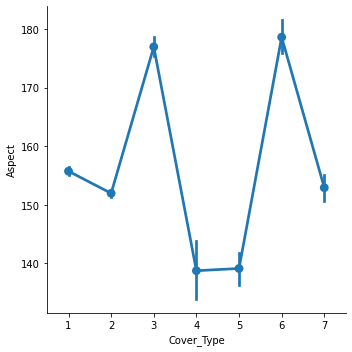

In [210]:
# Strip plot for COVER TYPE vs Aspect
sns.factorplot(x='Cover_Type',y='Aspect',data=forest)

**We could for the forest types 3 and 4 the Aspect ratio is very much high**

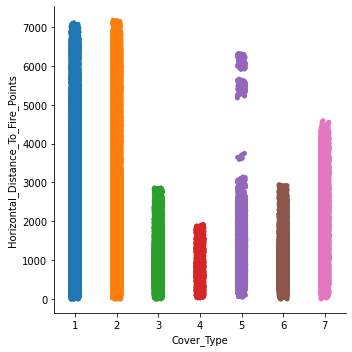

In [211]:
# Cat plot for COVER_TYPE vs HORIZONTAL_DISTANCE_TO_FIRE_POINTS columns
sns.catplot(x='Cover_Type',y='Horizontal_Distance_To_Fire_Points',data=forest)

**We could see the Horizontal Distance to Fire Points is high for forest types 1,2 and 7 so these forests are highly prone to forest fires**

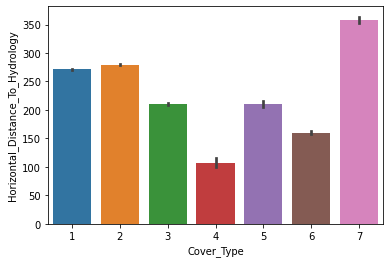

In [212]:
# Bar plot for COVER TYPE vs HORIZONTAL_DISTANCE_TO_HYDROLOGY
sns.barplot(x='Cover_Type',y='Horizontal_Distance_To_Hydrology',data=forest)

**We could see that the forest types 7,2 and 1 the Horizontal Distance to Hydrology is high so for Type 2 forest inspite of high distance of Fire Points its till safe from Fire Points as Hydrology is high and also this for Type 1**

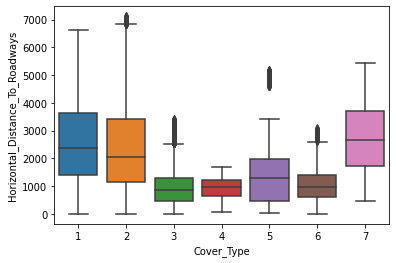

In [213]:
# Box plot for COVER TYPE vs HORIZONTAL_DISTANCE_TO_ROADWAYS
sns.boxplot(x='Cover_Type',y='Horizontal_Distance_To_Roadways',data=forest)

**We could see for the forest types 1,2 and 7 the Horizontal Distance to Roadways is high,so people using these Roadways should be careful during storms**

### 6. Perform all the regular ML models and then Boosting models and analyze the metrics

In [214]:
# Assigning x and y variables for model building
x = forest.drop('Cover_Type',1)
y = forest['Cover_Type']

In [215]:
# Scaling the x values using Standard Scaler and converting the scaled values to dataframe
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

x_scaled = pd.DataFrame(x_scaled,columns=x.columns)

In [216]:
# Importing the train_test_split for splitting the dataset
from sklearn.model_selection import train_test_split

In [217]:
# Splitting the dataset to train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.25)

### Performing Decision Tree Classification and analyzing the metrics

In [218]:
# Importing the DecisionTreeClassifier and fitting the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)

In [219]:
# Importing the metrics for evaluation
from sklearn import metrics

In [220]:
# Classification Report
print(metrics.classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       0.91      0.91      0.91     26320
           2       0.93      0.92      0.92     35633
           3       0.91      0.90      0.90      4481
           4       0.76      0.78      0.77       317
           5       0.75      0.76      0.75      1200
           6       0.81      0.83      0.82      2052
           7       0.92      0.92      0.92      2624

    accuracy                           0.91     72627
   macro avg       0.86      0.86      0.86     72627
weighted avg       0.91      0.91      0.91     72627



In [221]:
# Confusion Matrix
metrics.confusion_matrix(pred,y_test)

array([[24005,  2096,     0,     0,    29,    11,   179],
       [ 2215, 32872,   145,     0,   260,   116,    25],
       [    4,   117,  4045,    63,    13,   239,     0],
       [    0,     0,    47,   247,     0,    23,     0],
       [   43,   235,     9,     0,   909,     4,     0],
       [    7,   104,   215,    13,     4,  1709,     0],
       [  176,    40,     0,     0,     0,     0,  2408]])

In [222]:
# Accuracy score
dt_acc = metrics.accuracy_score(pred,y_test)
dt_acc

0.9114378949977281

In [223]:
# Cohen kappa score
dt_cohen = metrics.cohen_kappa_score(pred,y_test)
dt_cohen

0.8576718304885239

In [224]:
# Train score
dt_train = dt.score(x_train,y_train)
dt_train

1.0

In [225]:
# Test score
dt_test = dt.score(x_test,y_test)
dt_test

0.9114378949977281

### Performing Random Forest Classification and analyzing the metrics

In [226]:
# Importing the Random Forest Classifier and fitting the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred1 = rf.predict(x_test)

In [227]:
# Confusion matrix for Random Forest
metrics.confusion_matrix(pred1,y_test)

array([[24382,  1070,     0,     0,    25,     4,   167],
       [ 1992, 34212,   101,     0,   375,    79,    17],
       [    4,    84,  4232,    49,    14,   224,     0],
       [    0,     0,    26,   263,     0,    16,     0],
       [    6,    44,     4,     0,   794,     2,     0],
       [    4,    42,    98,    11,     7,  1777,     0],
       [   62,    12,     0,     0,     0,     0,  2428]])

In [228]:
# Classification Report for Random Forest
print(metrics.classification_report(pred1,y_test))

              precision    recall  f1-score   support

           1       0.92      0.95      0.94     25648
           2       0.96      0.93      0.95     36776
           3       0.95      0.92      0.93      4607
           4       0.81      0.86      0.84       305
           5       0.65      0.93      0.77       850
           6       0.85      0.92      0.88      1939
           7       0.93      0.97      0.95      2502

    accuracy                           0.94     72627
   macro avg       0.87      0.93      0.89     72627
weighted avg       0.94      0.94      0.94     72627



In [229]:
# Accuracy score for Random Forest
rf_acc = metrics.accuracy_score(pred1,y_test)
rf_acc

0.9375025816844975

In [230]:
# Cohen kappa score for Random Forest
rf_cohen = metrics.cohen_kappa_score(pred1,y_test)
rf_cohen

0.8988721253039527

In [231]:
# Train score for Random Forest
rf_train = rf.score(x_train,y_train)
rf_train

0.9999908205930815

In [232]:
# Test score for Random Forest
rf_test = rf.score(x_test,y_test)
rf_test

0.9375025816844975

### Performing KNearest Neighbors and analyzing the metrics

In [233]:
# Importing KNN and fitting the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [234]:
# Confusion matrix for KNN
metrics.confusion_matrix(knn_pred,y_test)

array([[25056,  1176,     1,     0,    24,     1,   124],
       [ 1276, 34056,   103,     0,   169,    99,    19],
       [    1,    72,  4232,    59,    13,   161,     0],
       [    0,     0,    26,   242,     0,    10,     0],
       [   17,    91,     5,     0,  1006,     5,     1],
       [    3,    54,    94,    22,     3,  1826,     0],
       [   97,    15,     0,     0,     0,     0,  2468]])

In [235]:
# Classification Report for KNN
print(metrics.classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95     26382
           2       0.96      0.95      0.96     35722
           3       0.95      0.93      0.94      4538
           4       0.75      0.87      0.81       278
           5       0.83      0.89      0.86      1125
           6       0.87      0.91      0.89      2002
           7       0.94      0.96      0.95      2580

    accuracy                           0.95     72627
   macro avg       0.89      0.92      0.91     72627
weighted avg       0.95      0.95      0.95     72627



In [236]:
# Accuracy score for KNN
knn_acc = metrics.accuracy_score(knn_pred,y_test)
knn_acc

0.9484902309058615

In [237]:
# Cohen kappa score for KNN
knn_cohen = metrics.cohen_kappa_score(knn_pred,y_test)
knn_cohen

0.917099254671798

In [238]:
# Train score for KNN
knn_train = knn.score(x_train,y_train)
knn_train

0.9723240881406652

In [239]:
# Test score for KNN
knn_test = knn.score(x_test,y_test)
knn_test

0.9484902309058615

### Performing Logistic Regression and fitting the model

In [240]:
# Importing the Logistic Regression and fitting the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg',multi_class='multinomial')
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [241]:

# Confusion matrix for Logistic Regression
metrics.confusion_matrix(lr_pred,y_test)

array([[18564,  6636,     0,     0,    23,     0,  1366],
       [ 7434, 28169,   586,     1,  1153,   538,    16],
       [    2,   452,  3493,   179,    24,  1119,     0],
       [    0,     0,    62,   100,     0,     4,     0],
       [    0,     0,     0,     0,     0,     0,     0],
       [    7,   173,   320,    43,    12,   440,     0],
       [  443,    34,     0,     0,     3,     1,  1230]])

In [242]:
# Accuracy score for Logistic Regression
lr_acc = metrics.accuracy_score(lr_pred,y_test)
lr_acc

0.7159320913709777

In [243]:
# Cohen kappa score for Logistic Regression
lr_cohen = metrics.cohen_kappa_score(lr_pred,y_test)
lr_cohen

0.5313652332890642

In [244]:
# Classification Report for Logistic Regression
print(metrics.classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           1       0.70      0.70      0.70     26589
           2       0.79      0.74      0.77     37897
           3       0.78      0.66      0.72      5269
           4       0.31      0.60      0.41       166
           5       0.00      0.00      0.00         0
           6       0.21      0.44      0.28       995
           7       0.47      0.72      0.57      1711

    accuracy                           0.72     72627
   macro avg       0.47      0.55      0.49     72627
weighted avg       0.74      0.72      0.73     72627



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [245]:
# Train score for Logistic Regression
lr_train = lr.score(x_train,y_train)
lr_train

0.7184125133675113

In [246]:
# Test score for Logistic Regression
lr_test = lr.score(x_test,y_test)
lr_test

0.7159320913709777

### Performing Ada Boost Classification and analyzing the metrics

In [166]:
# Importing Ada Boost Classifier and fitting the model
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
pred2 = ab.predict(x_test)

In [167]:
# Confusion matrix for Ada Boost
metrics.confusion_matrix(pred2,y_test)

array([[299, 145,   0,   0,   0,   0,  54],
       [122, 483,  17,   0,  22,  17,   0],
       [  0,   7,  46,   7,   0,  31,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

In [168]:
# Classification Report for Ada Boost
print(metrics.classification_report(pred2,y_test))

              precision    recall  f1-score   support

           1       0.71      0.60      0.65       498
           2       0.76      0.73      0.75       661
           3       0.73      0.51      0.60        91
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.66      1250
   macro avg       0.31      0.26      0.28      1250
weighted avg       0.74      0.66      0.70      1250



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
# Accuracy score for Ada Boost
ab_acc = metrics.accuracy_score(pred2,y_test)
ab_acc

0.6624

In [170]:
# Cohen kappa score for Ada Boost
ab_cohen = metrics.cohen_kappa_score(pred2,y_test)
ab_cohen

0.43118957400142777

In [171]:
# Train score for Ada Boost
ab_train = ab.score(x_train,y_train)
ab_train

0.6808

In [172]:
# Test score for Ada Boost 
ab_test = ab.score(x_test,y_test)
ab_test

0.6624

### Performing Gradient Boosting Classification and analyzing the metrics

In [173]:
# Importing Gradient Boosting Classifier and fitting the model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred3 = gb.predict(x_test)

In [174]:
# Confusion matrix for Gradient Boosting Classifier
metrics.confusion_matrix(pred3,y_test)

array([[294,  86,   0,   0,   0,   0,  28],
       [119, 535,   2,   0,  20,   7,   0],
       [  1,   7,  53,   3,   0,  19,   0],
       [  0,   0,   4,   4,   0,   2,   0],
       [  0,   0,   1,   0,   2,   0,   0],
       [  0,   7,   3,   0,   0,  20,   0],
       [  7,   0,   0,   0,   0,   0,  26]])

In [175]:
# Classification Report for Gradient Boosting Classifier
print(metrics.classification_report(pred3,y_test))

              precision    recall  f1-score   support

           1       0.70      0.72      0.71       408
           2       0.84      0.78      0.81       683
           3       0.84      0.64      0.73        83
           4       0.57      0.40      0.47        10
           5       0.09      0.67      0.16         3
           6       0.42      0.67      0.51        30
           7       0.48      0.79      0.60        33

    accuracy                           0.75      1250
   macro avg       0.56      0.67      0.57      1250
weighted avg       0.77      0.75      0.76      1250



In [176]:
# Accuracy score for Gradient Boosting Classifier
gb_acc = metrics.accuracy_score(pred3,y_test)
gb_acc

0.7472

In [177]:
# Cohen kappa score for Gradient Boosting Classifier
gb_cohen = metrics.cohen_kappa_score(pred3,y_test)
gb_cohen

0.5835266332082156

In [178]:
# Train score for Gradient Boosting Classifier
gb_train = gb.score(x_train,y_train)
gb_train

0.8709333333333333

In [179]:
# Test score for Gradient Boosting Classifier
gb_test = gb.score(x_test,y_test)
gb_test

0.7472

### Performing XG Boost Classification and analyzing the metrics

In [180]:
# Importing the XG Boost Classifier
from xgboost.sklearn import XGBClassifier

In [181]:
# Fitting the model
xgb_model = XGBClassifier() 

In [182]:
# Training the model
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [183]:
# Testing the model
pred4 = xgb_model.predict(x_test)

In [184]:
# Confusion matrix for XG Boost
metrics.confusion_matrix(pred4,y_test)

array([[285,  88,   0,   0,   0,   0,  26],
       [132, 537,   5,   0,  20,   9,   0],
       [  0,   8,  55,   2,   0,  24,   0],
       [  0,   0,   2,   4,   0,   1,   0],
       [  0,   0,   0,   0,   2,   0,   0],
       [  0,   2,   1,   1,   0,  14,   0],
       [  4,   0,   0,   0,   0,   0,  28]])

In [185]:
# Accuracy score for XG Boost
xgb_acc = metrics.accuracy_score(pred4,y_test)
xgb_acc

0.74

In [186]:
# Cohen kappa score for XG Boost
xgb_cohen = metrics.cohen_kappa_score(pred4,y_test)
xgb_cohen

0.5677382148146886

In [187]:
# Train score for XG Boost
xgb_train = xgb_model.score(x_train,y_train)
xgb_train

0.8016

In [188]:
# Test score for XG Boost
xgb_test = xgb_model.score(x_test,y_test)
xgb_test

0.74

### Performing LightGBM Classification and analyzing the metrics

In [189]:
import lightgbm as lgb

lightgb = lgb.LGBMClassifier()
lightgb.fit(x_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [190]:
pred5 = lightgb.predict(x_test)

In [191]:
# Confusion matrix for Light GBM
metrics.confusion_matrix(pred5,y_test)

array([[306,  79,   0,   0,   0,   0,  27],
       [111, 545,   2,   0,  19,   9,   1],
       [  0,   6,  54,   4,   0,  17,   0],
       [  0,   0,   2,   2,   0,   2,   0],
       [  0,   0,   0,   0,   3,   0,   0],
       [  0,   5,   5,   1,   0,  20,   0],
       [  4,   0,   0,   0,   0,   0,  26]])

In [192]:
# Classification Report for Light GBM
print(metrics.classification_report(pred5,y_test))

              precision    recall  f1-score   support

           1       0.73      0.74      0.73       412
           2       0.86      0.79      0.82       687
           3       0.86      0.67      0.75        81
           4       0.29      0.33      0.31         6
           5       0.14      1.00      0.24         3
           6       0.42      0.65      0.51        31
           7       0.48      0.87      0.62        30

    accuracy                           0.76      1250
   macro avg       0.54      0.72      0.57      1250
weighted avg       0.79      0.76      0.77      1250



In [193]:
# Accuracy score for Light GBM
light_acc = metrics.accuracy_score(pred5,y_test)
light_acc

0.7648

In [194]:
# Cohen kappa score for Light GBM
light_cohen = metrics.cohen_kappa_score(pred5,y_test)
light_cohen

0.6108986494212713

In [195]:
# Train score for Light GBM
light_train = lightgb.score(x_train,y_train)
light_train

0.9682666666666667

In [196]:
# Test score for Light GBM
light_test = lightgb.score(x_test,y_test)
light_test

0.7648

### 7. Create a dataframe of all the models with their metrics and compare the scores between each models

In [197]:
# Creating dictionary for all the metrics and models
metrics = {'Metrics': ['Train Score','Test Score','Accuracy Score','Cohen kappa score'],'Logistic Regression':[lr_train,lr_test,lr_acc,lr_cohen],
          'Decision Tree Classifier':[dt_train,dt_test,dt_acc,dt_cohen],'Ramdom Forest Classifier':[rf_train,rf_test,rf_acc,rf_cohen],'Light GBM Classifier':[light_train,light_test,light_acc,light_cohen],
          'KNearestNeighbor Classifier':[knn_train,knn_test,knn_acc,knn_cohen],
          'XG Boost Classifier':[xgb_train,xgb_test,xgb_acc,xgb_cohen],
          'Ada Boost Classifier':[ab_train,ab_test,ab_acc,ab_cohen],
          'Gradient Boosting Classifier':[gb_train,gb_test,gb_acc,gb_cohen]}

In [198]:
# Creating dataframe for all the metrics and models
metrics = pd.DataFrame(metrics)
metrics

,Metrics,Logistic Regression,Decision Tree Classifier,Ramdom Forest Classifier,Light GBM Classifier,KNearestNeighbor Classifier,XG Boost Classifier,Ada Boost Classifier,Gradient Boosting Classifier
0,Train Score,0.738667,1.000000,1.000000,0.968267,0.812267,0.801600,0.68080,0.870933
1,Test Score,0.718400,0.688000,0.773600,0.764800,0.689600,0.740000,0.66240,0.747200
2,Accuracy Score,0.718400,0.688000,0.773600,0.764800,0.689600,0.740000,0.66240,0.747200
3,Cohen kappa score,0.533073,0.495179,0.624404,0.610899,0.477769,0.567738,0.43119,0.583527


### 8. Give the final inference for the models you have created

We could from the dataframe that the models KNearestNeighbors,Light GBM and Random Forest are the best models